# Simple Linear Regression 처음부터 코딩하기!

In [2]:
# 기본 라이브러리들 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1-1: Fit Function 만들기
$$\beta_0=\bar{Y}-\beta_1*\bar{x}$$
$$\beta_1=\frac{\sum^n_{i=1}(Y_i-\bar{Y})x_i}{\sum^n_{i=1}(x_i-\bar{x})x_i}$$
이미 우리는 Simple Linear Regression에서 기울기와 절편을 구하는 방법을 알고 있습니다. 
수리통계학적 배경에서 이미 다뤘던 공식들입니다. 이제 이 공식들을 간단하게 코딩하기만하면 됩니다. Fit은 훈련시키다, 맞추다, 회귀시키다와 같은 의미를 가지고 있습니다. Scikit-Learn을 쓰면서 우리는 .fit()이라는 함수를 여러번 봤습니다. 이는 .train()이라고 명명했어도 됐지만, .fit()이 수많은 라이브러리에서 쓰이는 무언의 약속과 같기에, 여기서도 훈련함수를 fit()으로 정의하겠습니다.

In [4]:
# fit 함수 만들기
def fit(x_data, y_data):
    # 평균치 bar변수에 넣기
    x_bar = np.mean(x_data)
    y_bar = np.mean(y_data)
    # 기울기와 절편 계산하기
    beta_1 = np.sum((y_data-y_bar)*x_data)/np.sum((x_data-x_bar)*x_data)
    beta_0 = y_bar - beta_1*x_bar
    return beta_0, beta_1 # 값 리턴

# Step 1-2: Fit 함수를 Regressor클래스에 넣기
사실 위의 fit함수의 리턴 값을 변수로 받아서 해도되지만, 이 강의는 전공자들을 위한 것이기에
클래스를 만들고 그 안에 저장하겠습니다.

In [ ]:
class SimpleLinearRegression:
    # 생성자
    def __init__(self):
        self.beta_0 = None
        self.beta_1 = None
        
    # 저장된 기울기와 절편을 따로 뽑는 함수
    def coefs(self):
        return np.array([beta_0, beta_1])
    
    # fit함수
    def fit(self, x_data, y_data):
        # 평균치 bar변수에 넣기
        x_bar = np.mean(x_data)
        y_bar = np.mean(y_data)
        # 기울기와 절편 계산하기
        beta_1 = np.sum((y_data-y_bar)*x_data)/np.sum((x_data-x_bar)*x_data)
        beta_0 = y_bar - beta_1*x_bar
        # 리턴 대신 인스턴스 변수에 저장
        self.beta_0 = beta_0
        self.beta_1 = beta_1

# Step 2-1: Predict Function 만들기
새로운 값을 넣었을 때 예측을 가능하게 하는 predict 함수를 만들어줍니다.

In [ ]:
# predict 함수 만들기
def predict(new_x_data, beta_0, beta_1):
    
    # 인풋되는 new_x_data가 numpy의 행렬 클래스타입임을 체크합니다.
    if (type(new_x_data)!='numpy.ndarray'):
        print('새로운 x 데이터가 numpy.ndarray가 아닙니다!')
        
    # 연산하고 리턴
    predicted_y_data = beta_0 + beta_1*new_x_data
    return predicted_y_data

# Step 2-2: Predict 함수를 Regressor클래스에 넣기

In [50]:
class SimpleLinearRegression:
    # 생성자
    def __init__(self):
        self.beta_0 = 0
        self.beta_1 = 0
    
    # 저장된 기울기와 절편을 따로 뽑는 함수
    def coefs(self):
        return np.array([self.beta_0, self.beta_1])

    # fit 함수
    def fit(self, x_data, y_data):
        # 평균치 bar변수에 넣기
        x_bar = np.mean(x_data)
        y_bar = np.mean(y_data)
        # 기울기와 절편 계산하기
        beta_1 = np.sum((y_data-y_bar)*x_data)/np.sum((x_data-x_bar)*x_data)
        beta_0 = y_bar - beta_1*x_bar
        # 리턴 대신 인스턴스 변수에 저장
        self.beta_0 = beta_0
        self.beta_1 = beta_1
        
    # predict 함수
    # 이제 beta_0, beta_1 을 파라미터로 받지 않아도 됩니다.
    def predict(self, new_x_data):
    
        # 인풋되는 new_x_data가 numpy의 행렬 클래스타입임을 체크합니다.
        if (type(new_x_data)!='numpy.ndarray'):
            print('새로운 x 데이터가 numpy.ndarray가 아닙니다!')

        # 저장된 beta_0, beta_1로 연산하고 리턴
        predicted_y_data = self.beta_0 + self.beta_1*new_x_data
        return predicted_y_data

# Step 3: Scikit-Learn과 비교해보기
이제 우리가 만든 SimpleLinearRegression 클래스와 Scikit-Learn의
결과값이 차이가 나는지 봅시다.

# Step 3-1: 데이터 만들기
이번 강의에서는 데이터를 불러오지 않고 직접 간단하게 만들어봅시다.

In [30]:
# Numpy에서 랜덤 변수를 생성하기 위해 정규분포 함수를 가져옵니다.
# 참고 문서: https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html
np.random.normal(0,2,20) # 평균(mu), 표준편차(sigma), 개수

array([ 1.31275626, -1.20791568,  0.92081091,  2.84853062,  1.01503823,
       -0.45456691, -0.30525463,  1.33428607, -2.87716748,  0.72847217,
       -1.78172808,  2.61574843,  1.71918821,  1.30161998, -1.8616237 ,
        0.81415361,  1.18673008, -1.16770774, -0.95566574, -3.27247847])

Text(0, 0.5, 'generated y')

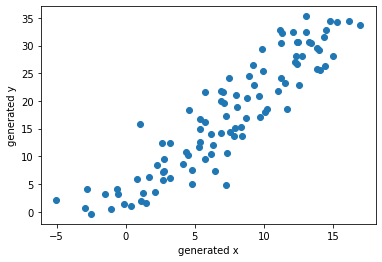

In [41]:
# 이전 셀은 예시였고, 이제 일정한 값에 랜덤 값 더해서 저장합니다.
# linspace는 일정한 간격으로 수들을 생성합니다.
# 참고 문서: https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
x_generated = np.linspace(0,15,100) + np.random.normal(0,2,100)
y_generated = np.linspace(0,35,100) + np.random.normal(0,0.5,100)
# 한번 시각화해서 살펴봅니다.
plt.scatter(x_generated, y_generated)
plt.xlabel('generated x')
plt.ylabel('generated y')

# Step 3-2: Scikit-Learn으로 기울기와 절편 구하기

In [52]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_generated.reshape(-1,1), y_generated)
print('기울기:', reg.coef_[0])
print('절편:', reg.intercept_)

기울기: 1.8724532712072912
절편: 3.6509907043133154


# Step 3-3: 우리의 클래스로 기울기와 절편 구하기

In [51]:
regressor = SimpleLinearRegression() # 클래스 생성
regressor.fit(x_generated, y_generated) # fit으로 beta_0, beta_1 계산 후 저장
regressor.coefs() # 기울기와 절편이 일치합니다!!!!!!!!!

array([3.6509907 , 1.87245327])